In [1]:
%matplotlib inline
from config import *
from dataset import *
from model import *
from display import *

In [2]:
data_path = data_path + "english" + "/"
model_path = model_path + "english" + "/"

dataset = Dataset("english", data_path, WINDOW_SIZE, BATCH_SIZE)
dataset.read_files()
dataset.preprocess()

Reading text files....
../data/english/01 - The Fellowship Of The Ring.txt
../data/english/01 Dragons of Autumn Twilight.txt
../data/english/01 Horselords.txt
../data/english/01 Shadowdale.txt
../data/english/01 Spellfire.txt
../data/english/01 The Legend Of Huma.txt
../data/english/01 The Second Generation.txt
../data/english/01 The Thousand Orcs.txt
../data/english/01 Time Of The Twins.txt
../data/english/02 - The Two Towers.txt
../data/english/02 Crown of Fire.txt
../data/english/02 Dragons of Summer Flame.txt
../data/english/02 Dragons of Winter Night.txt
../data/english/02 Dragonwall.txt
../data/english/02 Tantras.txt
../data/english/02 The Lone Drow.txt
../data/english/02 War Of The Twins.txt
../data/english/03 - The Return Of The King.txt
../data/english/03 Crusade.txt
../data/english/03 Dragons of Spring Dawning.txt
../data/english/03 Test Of The Twins.txt
../data/english/03 The Two Swords.txt
../data/english/03 Waterdeep.txt
../data/english/04 - Appendices And Index.txt
../dat

In [3]:
vocab_size = dataset.vocab_size

print "Vocab size", vocab_size

x_training_batches = dataset.x_training_batches
y_training_batches = dataset.y_training_batches

model = Model(vocab_size)
model.run(x_training_batches, y_training_batches, N_INTERS)

Vocab size 115943
Number of batches to train 475318
Number of interations to train 500000
avg loss after 999 turn is :  7.1483181726 - in: 6.63868403435
avg loss after 1999 turn is :  6.30796726789 - in: 3.13056111336
avg loss after 2999 turn is :  5.84695851396 - in: 2.88124299049
avg loss after 3999 turn is :  5.95026881945 - in: 3.6091811657
avg loss after 4999 turn is :  5.22207664317 - in: 4.96715807915
avg loss after 5999 turn is :  5.66812050879 - in: 4.6560549736
avg loss after 6999 turn is :  5.24877811928 - in: 3.02076506615
avg loss after 7999 turn is :  5.31015173311 - in: 5.50176000595
avg loss after 8999 turn is :  4.98496557852 - in: 6.1735959053
avg loss after 9999 turn is :  4.83450123923 - in: 7.05577898026
avg loss after 10999 turn is :  5.01919744887 - in: 6.682543993
avg loss after 11999 turn is :  4.84169480845 - in: 5.81252193451
avg loss after 12999 turn is :  4.74581000421 - in: 3.36029791832
avg loss after 13999 turn is :  4.32108630058 - in: 3.06610393524
avg

In [12]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_top_closest(word, embeddings, n_top):

    word_index = word2int[word]

    min_dist = 10000 # to act like positive infinity
    min_index = -1

    all_dist = []

    query_vector = embeddings[word_index]

    for index, vector in enumerate(embeddings):

        if not np.array_equal(vector, query_vector):
            all_dist.append({'index' : int2word[index], 'dist' : euclidean_dist(vector, query_vector)})

    newlist = sorted(all_dist, key=lambda k: k['dist'])
    return newlist[:n_top]

embedding = model.get_final_embedding()
word2int = dataset.word2int
int2word = dataset.int2word


fred
ah
eat
griphook
apple
tent
problems
curtsy
sweeping
idaho


In [15]:

target_word = "two"
top_word = find_top_closest(target_word, embedding, 10)
for i in top_word:
    print i["index"]

cold
yeah
actually
stiffly
emerged
forcing
pond
ghost
roof
``


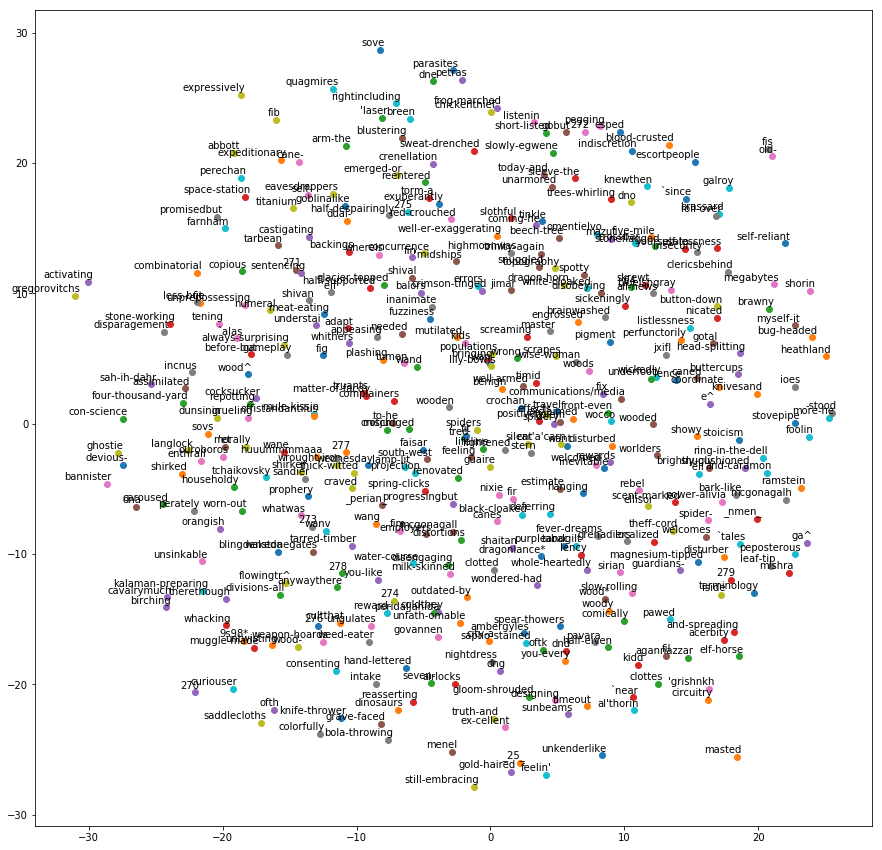

In [13]:
from matplotlib import pylab
from six.moves import range
from six.moves.urllib.request import urlretrieve
from sklearn.manifold import TSNE

num_points = 400

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
two_d_embeddings = tsne.fit_transform(embedding[1:num_points+1, :])

def plot(embeddings, labels):
    pylab.figure(figsize=(15,15))  # in inches
    for i, label in enumerate(labels):
        x, y = embeddings[i,:]
        pylab.scatter(x, y)
        pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                   ha='right', va='bottom')
    pylab.show()
    
words = [int2word[i] for i in range(1, num_points+1)]
plot(two_d_embeddings, words)

